In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dense, Flatten, UpSampling2D

In [134]:
data = np.load('./Image_Classification/mnist_compressed.npz')

X_test, y_test, X_train, y_train =  data['test_images'], data['test_labels'], data['train_images'], data['train_labels']

In [135]:
X_train.shape

(60000, 28, 56)

##### The scale of std dev of the gaussian is one of the hyper param affecting the noise the most
##### Also the noise_factor more big = more noise

In [136]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [137]:
noise_factor = 0.6
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [138]:
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 56, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 56, 1))
X_train = np.reshape(X_train, (len(X_train), 28, 56, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 56, 1))

In [139]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

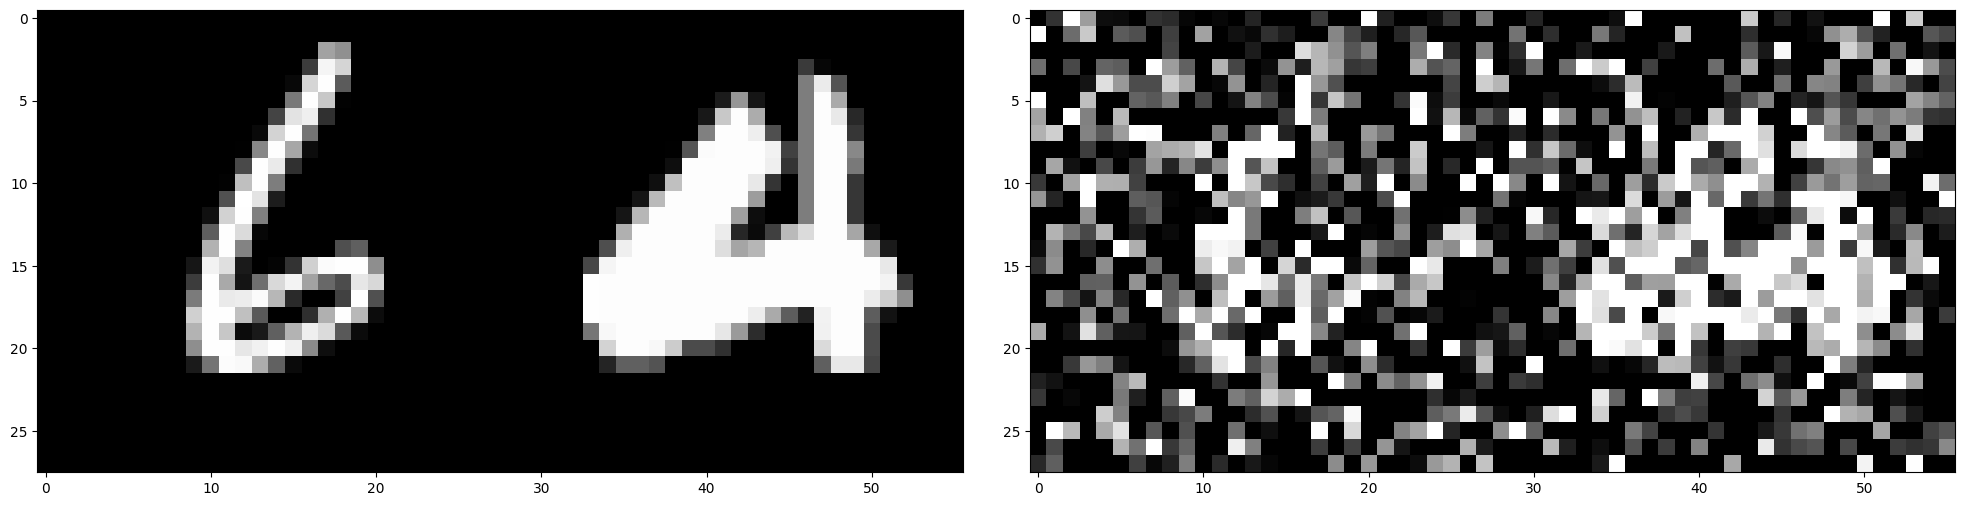

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.gray()
axes[0].imshow(X_train[0, : ,: , :])
axes[1].imshow(x_train_noisy[0, :,: , :])


plt.tight_layout()
plt.show()

In [141]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 56, 1)),
                    MaxPool2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPool2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 28, 56, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 14, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 14, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 7, 14, 16)      │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_22 (UpSampling2D) │ (None, 14, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 14, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_23 (UpSampling2D) │ (None, 28, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 28, 56, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history = model.fit(x_train_noisy, X_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, X_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.8038 - loss: 0.3479 - val_accuracy: 0.8052 - val_loss: 0.1501
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8060 - loss: 0.1465 - val_accuracy: 0.8078 - val_loss: 0.1364
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8078 - loss: 0.1363 - val_accuracy: 0.8077 - val_loss: 0.1308
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8089 - loss: 0.1312 - val_accuracy: 0.8085 - val_loss: 0.1272
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8094 - loss: 0.1278 - val_accuracy: 0.8098 - val_loss: 0.1252
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8100 - loss: 0.1255 - val_accuracy: 0.8091 - val_loss: 0.1230
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8100 - loss: 0.1238 - val_accuracy: 0.8100 - val_loss: 0.1218
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.8104 - loss: 0.1225 - 

In [143]:
model.save('./denoise_2.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


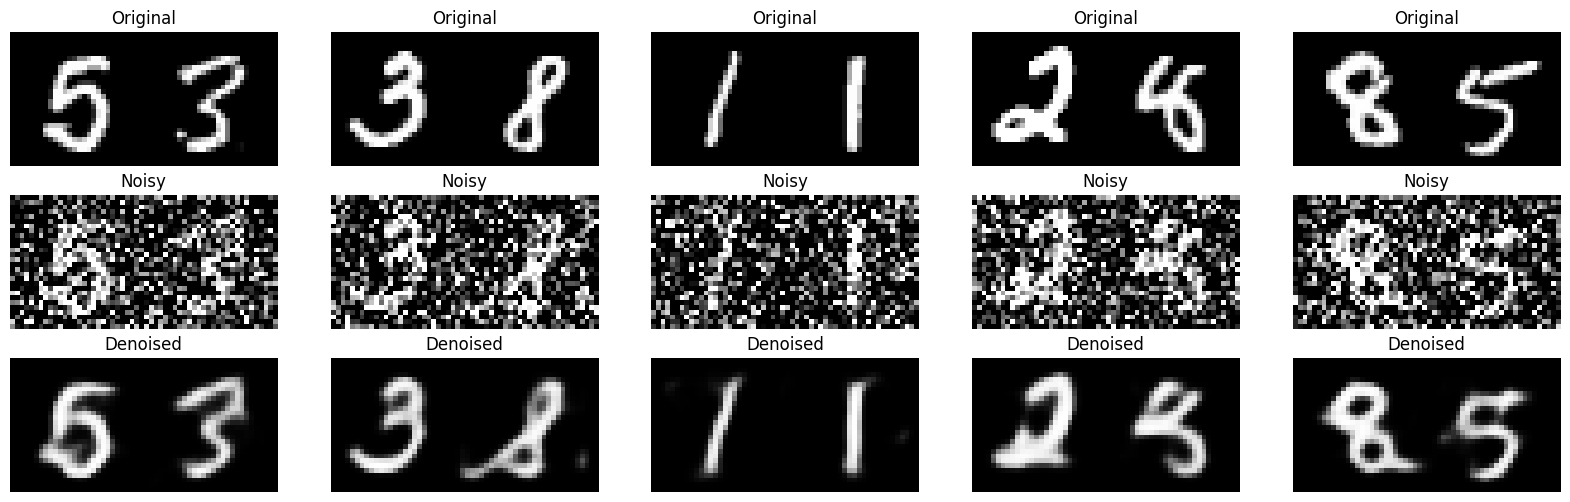

In [144]:
denoised_images = model.predict(x_test_noisy)

# Plot original, noisy, and denoised images
n = 5  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 56), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 56), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 56), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()